In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [5]:
pd.set_option('display.max_colwidth', -1) 
df_raw_data = pd.read_csv('Data\webmd.csv')

In [19]:
df_raw_data = df_raw_data.replace(r'^\s*$', np.nan, regex = True )
df_drop_na = df_raw_data[~df_raw_data['Reviews'].isnull()]

#Remove invalid reviews
remove = [df_drop_na['Reviews'].value_counts().index[i] for i in [1,2,3,6,7]]
advert = list(df_drop_na[df_drop_na['Reviews'].str.contains(r'WhatsApp') == True ]['Reviews'].unique())
remove += advert 
useful = ['ok','OK','Ok','bad','yum','OK?', 'ok\n', 'Yay', 'fine','good','o.k.','GOOD','Cool','okay','pain','fair','PAIN','Good','Fine','poor','A ok','WOW!','well','ok \n','Fine','Poor','LAME','weak','A OK','WOW\n']
remove += [x for x in df_drop_na['Reviews'].unique() if  len(x) <= 4 and x not in useful]
df_drop_bad = df_drop_na[~df_drop_na['Reviews'].isin(remove)]

#Remove entires duplicated by drug name 
remove = []
ids  = list(df_drop_bad['DrugId'].unique())
drugs_for_id = {}
for id in ids:
    drugs_for_id[id] = list(df_drop_bad[df_drop_bad['DrugId'] == id ]['Drug'].unique())
dup = [x for x in ids if len(drugs_for_id[x]) > 1]
for id in dup:
    l = drugs_for_id[id]
    for drug in l[1:]:
        remove.append(drug)
df_drop_dup = df_drop_bad[~df_drop_bad['Drug'].isin(remove)]

#Remove completely identical entries
remove=[]
dup_rev = [df_drop_dup['Reviews'].value_counts().index[i] for i in range(7,31)]
for rev in dup_rev:
    for i in range(1,27):
        remove.append(df_drop_dup.index[df_drop_dup['Reviews'] == rev][i])
df_drop_dup_= df_drop_dup[~df_drop_dup.index.isin(remove)]

df = df_drop_dup_[(df_drop_dup_['Satisfaction'] != 6)]

df['Satisfaction'] = df['Satisfaction'].replace([1,2,3,4,5], ['Negative','Neutral', 'Neutral', 'Neutral', 'Positive'])

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
df.shape

(252072, 12)

In [21]:
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I have tried for my allergies (seasonal and not) - this one is the most effective for me. When I first began using this drug some years ago - tiredness as a problem but is not currently.,Positive,Male,"Drowsiness, dizziness , dry mouth /nose/throat, headache , upset stomach , constipation , or trouble sleeping may occur.",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurting it went away after taking the medicine,Positive,Female,"Drowsiness, dizziness , dry mouth /nose/throat, headache , upset stomach , constipation , or trouble sleeping may occur.",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to over \n100?,Neutral,Female,NaN,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,Negative,Female,NaN,0
4,35-44,Other,01/06/2009,warfarin (bulk) 100 % powder,144731,1,1,"My grandfather was prescribed this medication (Coumadin) to assist in blood thinning due to a heart and thyroid condition. His primary doctor was aware that he was on an aspirin regiment and still prescribed this medicine, it caused his blood to thin out to much and he ended up internally bleeding to death. If you are going to take this medicine please ask your doctors about possible side effects or drug interactions.",Negative,Male,NaN,1
5,55-64,Other,7/19/2008,warfarin (bulk) 100 % powder,144731,4,4,help heart condition operation well,Neutral,Male,NaN,0
6,25-34,Birth Control,6/15/2017,wymzya fe,163180,5,5,"Haven't gotten pregnant so it does it's job. I was switched to this brand from another generic. I get nauseous and generally feel tired on this, also more headaches.",Neutral,Female,"Nausea , vomiting , headache , bloating , breast tenderness, swelling of the ankles /feet (fluid retention), or weight change may occur.",0
7,45-54,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prevent ovarian cysts (I had 2 burst). Now stopped because of age. No side effects.,Positive,Female,"Nausea , vomiting , headache , bloating , breast tenderness, swelling of the ankles /feet (fluid retention), or weight change may occur.",0
9,55-64,Stuffy Nose,10/29/2012,"12 hour nasal relief spray, non-aerosol",9800,4,2,The 12 hour spray only works for me for 6 hours.,Neutral,Male,"Temporary burning, stinging, dryness in the nose, runny nose , and sneezing may occur.",0
10,65-74,Other,3/15/2016,pyrogallol crystals,12112,5,5,Excellent in reducing inlamation associated with osteo-arthritis!,Positive,Male,NaN,0


In [35]:
SMALL_SIZE = 40
MEDIUM_SIZE = 44
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

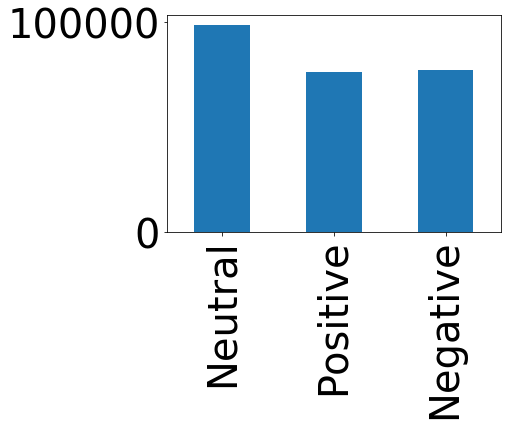

In [36]:
ax = df['Satisfaction'].value_counts(sort=False).plot(kind='bar')

In [31]:
ratings = df['Satisfaction'].value_counts(sort = False)


ratings


Neutral     98606
Positive    76312
Negative    77154
Name: Satisfaction, dtype: int64

Text(0, 0.5, 'Number of entries')

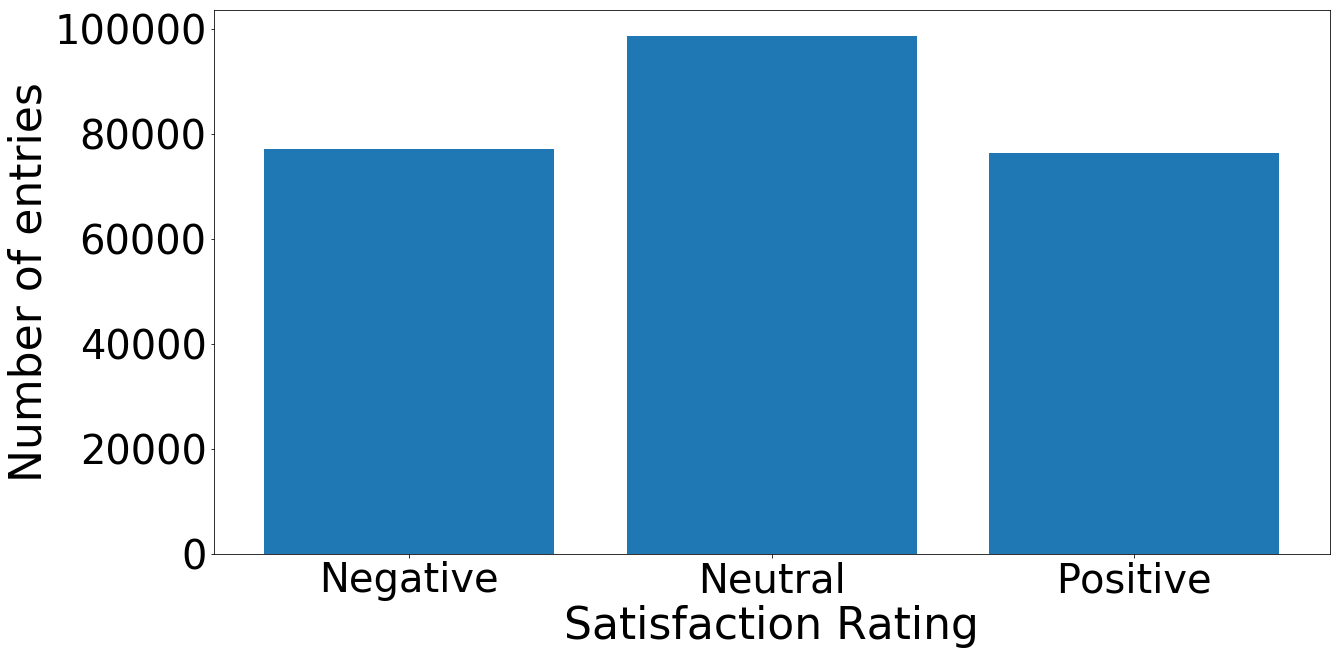

In [38]:
plt.figure(figsize=(20,10))
plt.bar(['Negative','Neutral','Positive'], [ratings[2],ratings[0],ratings[1]])
plt.xlabel("Satisfaction Rating")
plt.ylabel("Number of entries")